In [1]:
#Install Tensorflow
!pip install -q tensorflow==2.0.0
import tensorflow as tf
print(tf.__version__)

     |████████████████████████████████| 86.3 MB 41 kB/s 
     |████████████████████████████████| 50 kB 5.4 MB/s 
     |████████████████████████████████| 449 kB 41.2 MB/s 
     |████████████████████████████████| 3.8 MB 40.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-probability 0.16.0 requires gast>=0.3.2, but you have gast 0.2.2 which is incompatible.
2.0.0


In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2022-07-07 07:25:08--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.1’

moore.csv.1         100%[===================>]   2.25K  --.-KB/s    in 0s      

2022-07-07 07:25:08 (24.3 MB/s) - ‘moore.csv.1’ saved [2302/2302]



In [4]:
data=pd.read_csv('moore.csv', header=None).values
X = data[:,0].reshape(-1,1)
Y=data[:,1]

In [ ]:
print(X, Y)

In [ ]:
plt.scatter(X, Y)

In [ ]:
Y = np.log(Y)
plt.scatter(X, Y)

In [9]:
X = X - X.mean()

In [ ]:
# creating tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compiling model
model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss='mse')

# learning rate scheduler
def schedule(epoch, lr):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

# train the model
r = model.fit(X, Y, epochs=200, callbacks=[scheduler])

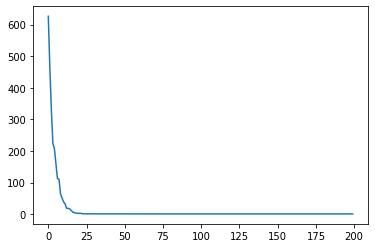

In [14]:
plt.plot(r.history['loss'], label='loss')

In [16]:
print(model.layers)
print(model.layers[0].get_weights())

[array([[0.3311257]], dtype=float32), array([17.772076], dtype=float32)]


In [17]:
a = model.layers[0].get_weights()[0][0,0]

In [18]:
print('Time to Double:', np.log(2) / a)

Time to Double: 2.093305252630938


In [ ]:
X = np.array(X).flatten()
Y = np.array(Y)

denominator = X.dot(X) - X.mean() * X.sum()

a = (X.dot(Y) - Y.mean()*X.sum()) / denominator
b = (Y.mean() * X.dot(X) - X.mean() * X.dot(Y)) / denominator
print(a, b)
print('TIme to Double:', np.log(2) / a)